ValueError: x and y must have same first dimension, but have shapes (5,) and (4,)

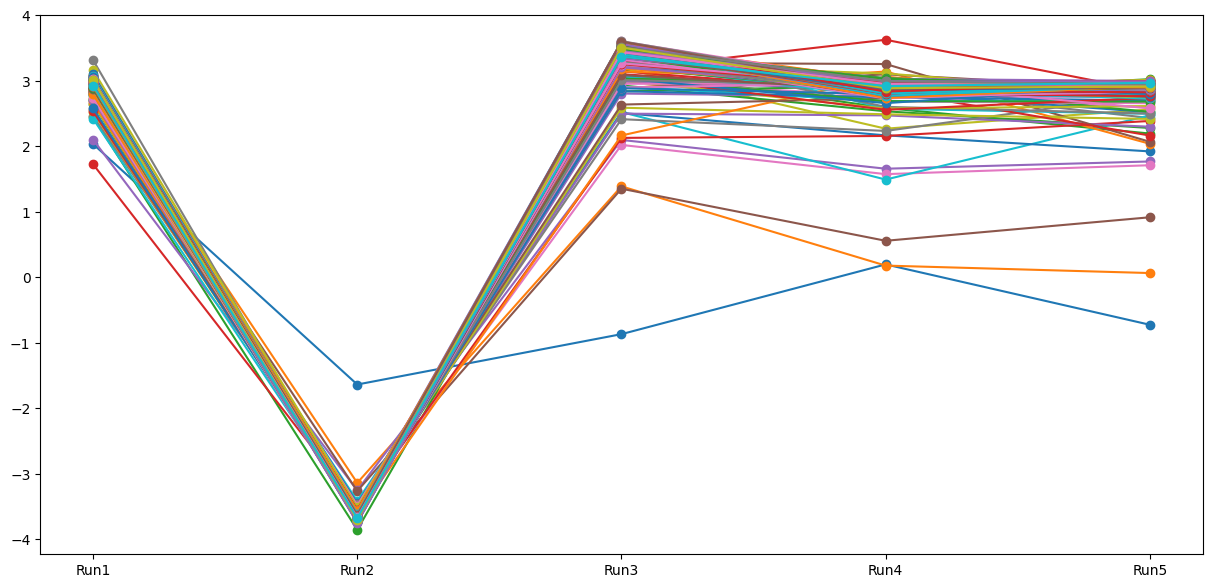

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Function to load data from a given Excel file
def load_data(file_path):
    return pd.read_excel(file_path)

# Define the path to your files
file_paths = [
    ('/content/drive/MyDrive/Colab Notebooks/historicalData_Run1.xlsx'), # 1000 itr
    '/content/drive/MyDrive/Colab Notebooks/historicalData_Run2.xlsx',   # 800 itr
    '/content/drive/MyDrive/Colab Notebooks/historicalData_Run3.xlsx',   # 600 itr
    '/content/drive/MyDrive/Colab Notebooks/historicalData_Run4.xlsx',   # 400 itr
    '/content/drive/MyDrive/Colab Notebooks/historicalData_Run5.xlsx'    # 300 itr
]

# Load each dataset into a list of DataFrames
datasets = [load_data(path) for path in file_paths]

# Iteration counts for each run
iteration_counts = [1000, 800, 600, 400, 300]

# Calculate the means for each iteration for Var1 and Var2 across all runs
# We create a nested dictionary where the outer keys are the variable names
# and the inner keys are the iteration indices
means = {'Var1': {}, 'Var2': {}}

# Loop over each run and each variable
for run_idx, (data, itr_count) in enumerate(zip(datasets, iteration_counts)):
    for i in range(1, itr_count + 1):  # +1 because range is exclusive on the upper end
        for var in ['Var1', 'Var2']:
            column_name = f'{var}_Iter{i}'
            if column_name in data.columns:  # Check if the column exists in the current run
                if i not in means[var]:
                    means[var][i] = []
                means[var][i].append(data[column_name].mean())

# For example, to plot the means for the first iteration of Var1 and Var2 across all runs:
plt.figure(figsize=(15, 7))

# plot the means for the available iterations for Var1
for itr in means['Var1']:
    plt.plot(['Run1', 'Run2', 'Run3', 'Run4', 'Run5'], means['Var1'][itr], marker='o', label=f'Var1_Iter{itr}')
for itr in means['Var2']:
    plt.plot(['Run1', 'Run2', 'Run3', 'Run4', 'Run5'], means['Var2'][itr], marker='o', linestyle='--', label=f'Var2_Iter{itr}')

plt.xlabel('Run')
plt.ylabel('Mean Value')
plt.title('Mean Value of Iterations Across Runs')
plt.show()

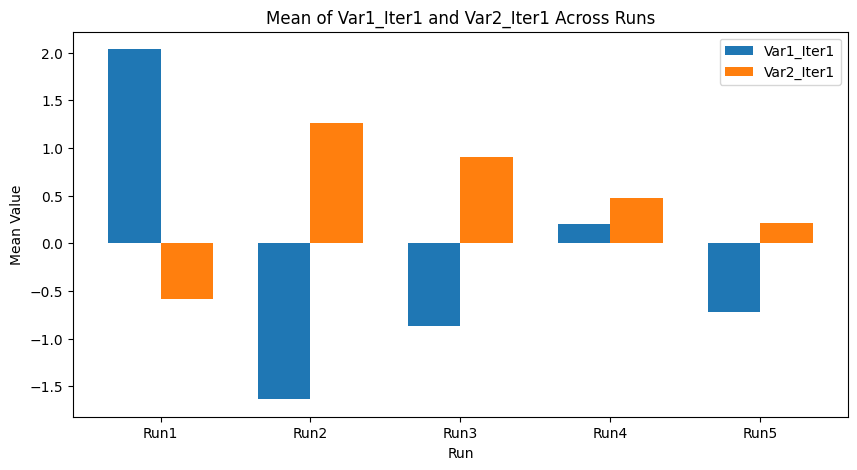

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data from the files
def load_data(file_name):
    return pd.read_excel(file_name)

# Names of the files for each run and the number of iterations in each
file_info = {
    'Run1': ('/content/drive/MyDrive/Colab Notebooks/historicalData_Run1.xlsx', 1000),
    'Run2': ('/content/drive/MyDrive/Colab Notebooks/historicalData_Run2.xlsx', 800),
    'Run3': ('/content/drive/MyDrive/Colab Notebooks/historicalData_Run3.xlsx', 600),
    'Run4': ('/content/drive/MyDrive/Colab Notebooks/historicalData_Run4.xlsx', 400),
    'Run5': ('/content/drive/MyDrive/Colab Notebooks/historicalData_Run5.xlsx', 300)
}

# Initialise dictionary to store mean values for each iteration of Var1 and Var2 across runs
means_var1 = {}
means_var2 = {}

# Loop through each run and calculate the means for each Var1 and Var2 up to the max iteration for that run
for run, (file_name, max_iter) in file_info.items():
    # Load the dataset for the current run
    dataset = load_data(file_name)

    # Loop through each iteration number and calculate the mean for Var1 and Var2
    for i in range(1, max_iter + 1):
        var1_col = f'Var1_Iter{i}'
        var2_col = f'Var2_Iter{i}'

        # Calculate and store the means for Var1
        if var1_col in dataset.columns:
            means_var1.setdefault(var1_col, []).append(dataset[var1_col].mean())
        # Calculate and store the means for Var2
        if var2_col in dataset.columns:
            means_var2.setdefault(var2_col, []).append(dataset[var2_col].mean())

# plot the means for the first iteration of Var1 and Var2 across the runs that have this iteration
plt.figure(figsize=(10, 5))
plt.title('Mean of Var1_Iter1 and Var2_Iter1 Across Runs')

# Assume all runs have at least 1 iteration
runs = list(file_info.keys())

means_var1_iter1 = means_var1.get('Var1_Iter1', [])
means_var2_iter1 = means_var2.get('Var2_Iter1', [])

# Ensure there are means to plot for both Var1 and Var2
if means_var1_iter1 and means_var2_iter1:
    # Calculate the number of runs that have data for both Var1 and Var2 Iter1
    num_runs_to_plot = min(len(means_var1_iter1), len(means_var2_iter1))

    # Adjust runs to match the number of data points we have
    runs_to_plot = runs[:num_runs_to_plot]

    # Create bar positions for Var1 and Var2
    bar_width = 0.35
    r1 = range(len(runs_to_plot))
    r2 = [x + bar_width for x in r1]

    # Plotting Var1 and Var2 means
    plt.bar(r1, means_var1_iter1[:num_runs_to_plot], width=bar_width, label='Var1_Iter1', align='center')
    plt.bar(r2, means_var2_iter1[:num_runs_to_plot], width=bar_width, label='Var2_Iter1', align='center')

    # Adding labels and legend
    plt.xlabel('Run')
    plt.ylabel('Mean Value')
    plt.xticks([r + bar_width/2 for r in range(len(runs_to_plot))], runs_to_plot)
    plt.legend()

    # Show the plot
    plt.show()

In [ ]:
# Initialise dictionaries to store the final mean values for Var1 and Var2 for each run
final_means_var1 = {}
final_means_var2 = {}

# Loop through each run and calculate the mean of the final iteration for Var1 and Var2
for run, (file_name, max_iter) in file_info.items():
    # Load the dataset for the current run
    dataset = load_data(file_name)

    # Identify the final iteration columns for Var1 and Var2
    final_var1_col = f'Var1_Iter{max_iter}'
    final_var2_col = f'Var2_Iter{max_iter}'

    # Calculate and store the final means for Var1 and Var2
    final_means_var1[run] = dataset[final_var1_col].mean()
    final_means_var2[run] = dataset[final_var2_col].mean()

# Determine the best run for Var1 and Var2 based on the final iteration mean
# For a minimisation problem, the best run is the one with the lowest mean
best_run_var1 = min(final_means_var1, key=final_means_var1.get)
best_run_var2 = min(final_means_var2, key=final_means_var2.get)

print(f"The best run for Var1 based on the final iteration mean is: {best_run_var1}")
print(f"The best run for Var2 based on the final iteration mean is: {best_run_var2}")


The best run for Var1 based on the final iteration mean is: Run2
The best run for Var2 based on the final iteration mean is: Run2


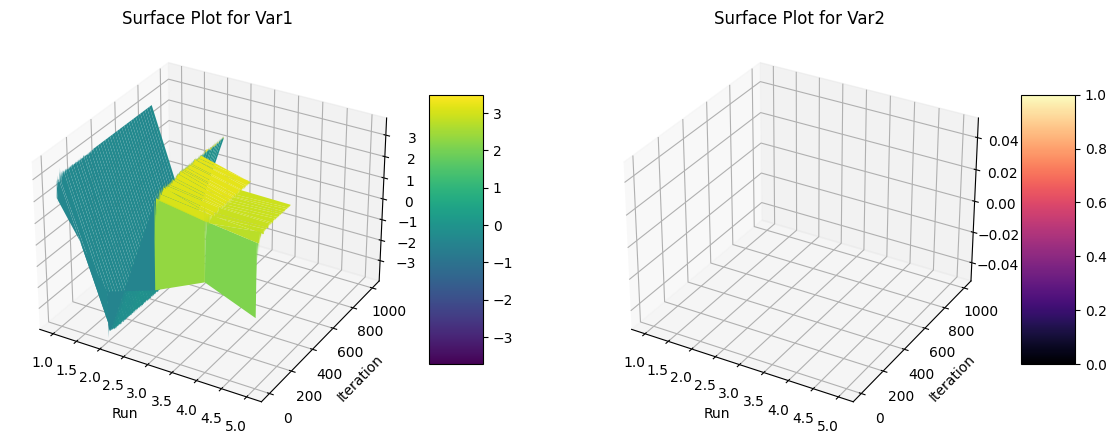

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# Helper function to prepare data for surf plot
def prepare_surf_data(means_dict, max_iter):
    z_data = []
    for i in range(1, max_iter + 1):
        iter_means = means_dict.get(f'Var1_Iter{i}', [])
        # Pad the list with nan if this iteration doesn't exist in all runs
        iter_means += [np.nan] * (len(file_info) - len(iter_means))
        z_data.append(iter_means)
    return np.array(z_data)

# Assuming max_iter across all runs for consistency in surface plotting
max_iter = 1000
z_data_var1 = prepare_surf_data(means_var1, max_iter)
z_data_var2 = prepare_surf_data(means_var2, max_iter)

# Prepare the data for plotting
X = np.arange(1, len(file_info) + 1)  # X-axis for runs
Y = np.arange(1, max_iter + 1)  # Y-axis for iterations
X, Y = np.meshgrid(X, Y)  # Create grid for plotting

# Create the plot for Var1
fig = plt.figure(figsize=(14, 7))
ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.set_title('Surface Plot for Var1')
surf = ax.plot_surface(X, Y, z_data_var1, cmap='viridis', edgecolor='none')
ax.set_xlabel('Run')
ax.set_ylabel('Iteration')
ax.set_zlabel('Mean Value')
fig.colorbar(surf, ax=ax, shrink=0.5, aspect=5)  # Add a color bar

# Create the plot for Var2
ax = fig.add_subplot(1, 2, 2, projection='3d')
ax.set_title('Surface Plot for Var2')
surf = ax.plot_surface(X, Y, z_data_var2, cmap='magma', edgecolor='none')
ax.set_xlabel('Run')
ax.set_ylabel('Iteration')
ax.set_zlabel('Mean Value')
fig.colorbar(surf, ax=ax, shrink=0.5, aspect=5)  # Add a color bar

plt.show()

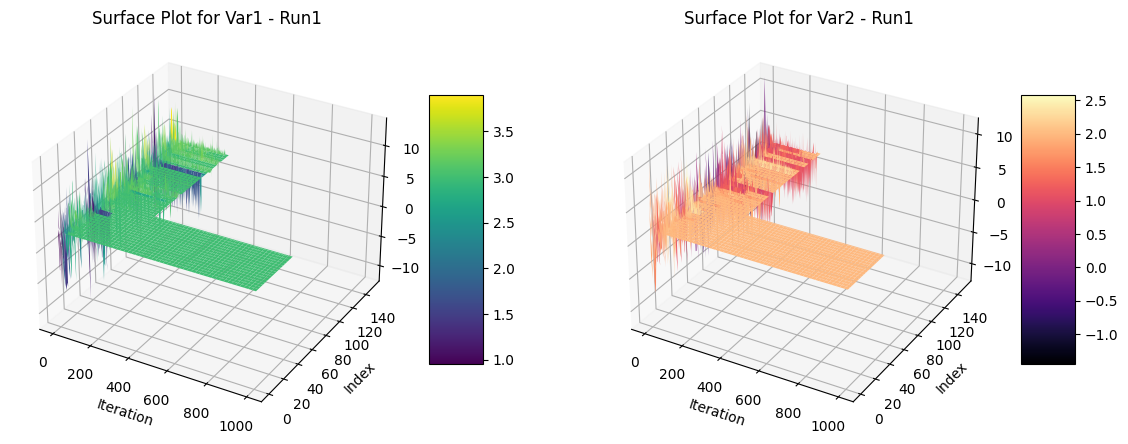

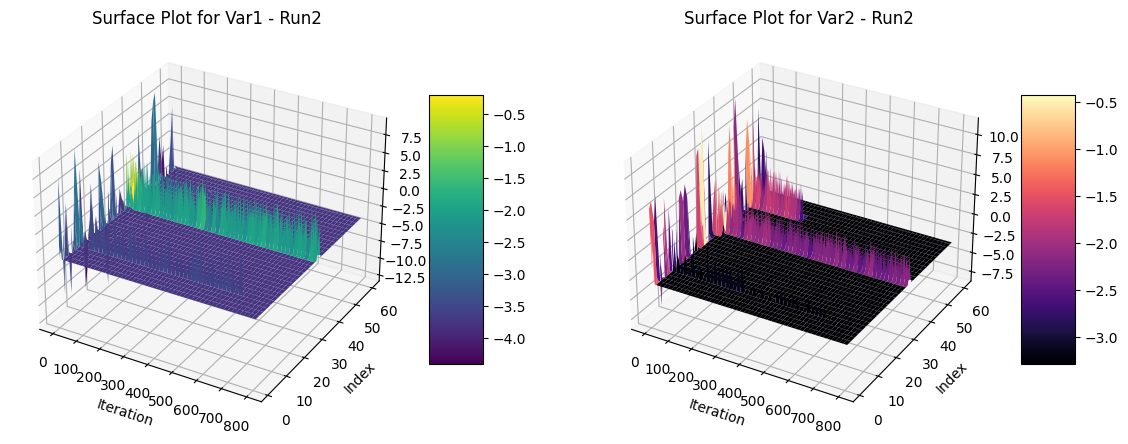

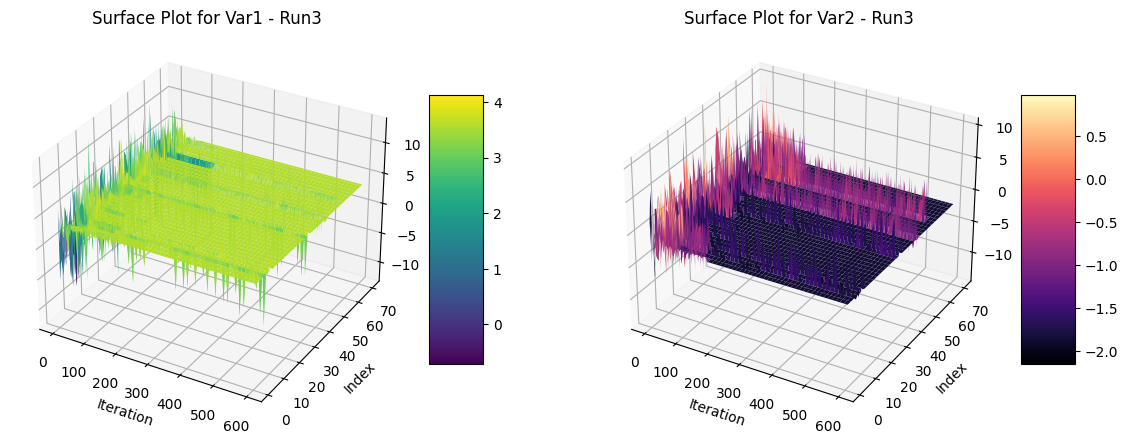

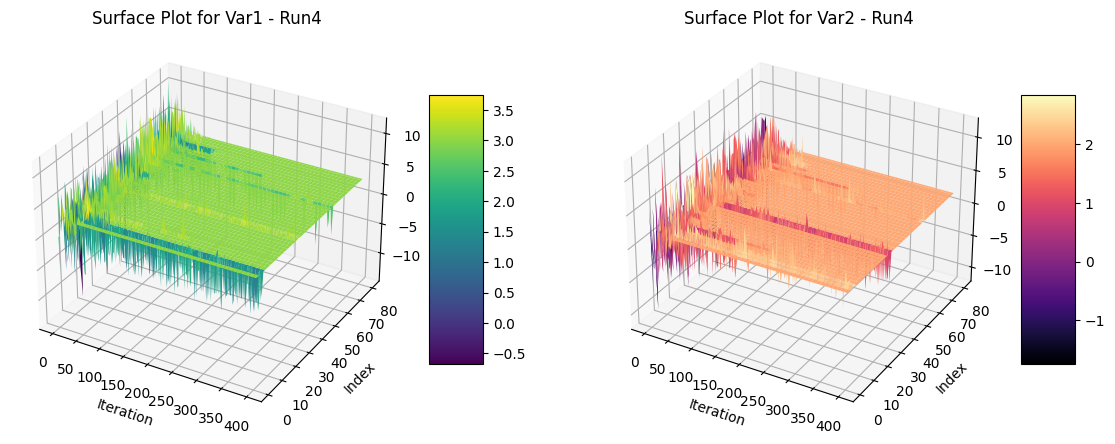

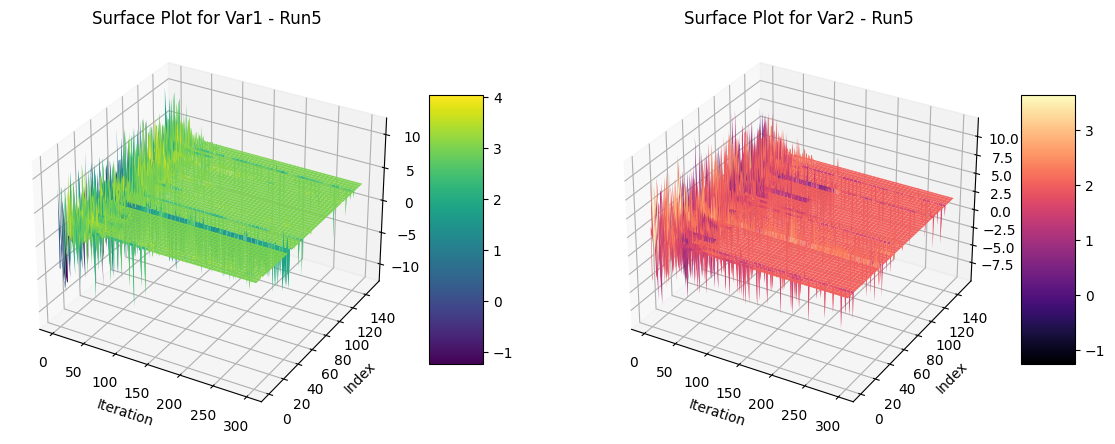

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt

# Function to prepare the surface plot data for a single run
def prepare_single_run_surf_data(dataset, var_prefix, max_iter):
    # Extract iteration columns for the variable
    iter_columns = [col for col in dataset.columns if col.startswith(var_prefix)]
    # Limit to the max iterations if specified
    if max_iter:
        iter_columns = iter_columns[:max_iter]
    # Prepare the data grid for the surface plot
    Z = dataset[iter_columns].values
    X, Y = np.meshgrid(range(1, Z.shape[1] + 1), range(1, Z.shape[0] + 1))
    return X, Y, Z

# Plotting surface plot for each run
for run, (file_name, max_iter) in file_info.items():
    dataset = load_data(file_name)  # Use the load_data function from earlier
    fig = plt.figure(figsize=(14, 7))

    # Plot for Var1
    X, Y, Z = prepare_single_run_surf_data(dataset, 'Var1_', max_iter)
    ax1 = fig.add_subplot(1, 2, 1, projection='3d')
    ax1.set_title(f'Surface Plot for Var1 - {run}')
    surf1 = ax1.plot_surface(X, Y, Z, cmap='viridis', edgecolor='none')
    ax1.set_xlabel('Iteration')
    ax1.set_ylabel('Index')
    ax1.set_zlabel('Var1 Value')
    fig.colorbar(surf1, ax=ax1, shrink=0.5, aspect=5)

    # Plot for Var2
    X, Y, Z = prepare_single_run_surf_data(dataset, 'Var2_', max_iter)
    ax2 = fig.add_subplot(1, 2, 2, projection='3d')
    ax2.set_title(f'Surface Plot for Var2 - {run}')
    surf2 = ax2.plot_surface(X, Y, Z, cmap='magma', edgecolor='none')
    ax2.set_xlabel('Iteration')
    ax2.set_ylabel('Index')
    ax2.set_zlabel('Var2 Value')
    fig.colorbar(surf2, ax=ax2, shrink=0.5, aspect=5)

    plt.show()  # Show the plot for the current run

    # Save the plot as an image file if needed
    # fig.savefig(f'surface_plot_{run}.png')

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Generate a heatmap for Var1 across all iterations for Run1
plt.figure(figsize=(14, 7))
sns.heatmap(Run1.filter(regex='Var1_Iter'), annot=False, cmap='coolwarm')
plt.title('Heatmap of Var1 for Run1 Across Iterations')
plt.xlabel('Iterations')
plt.ylabel('Index')
plt.show()
